building a character level language model which predicts what comes next based on what it has 
trained, which are just individual characters/names

In [1]:
words = open('names.txt', 'r').read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
bigrams_hashmap = {}  #maintains a dictionary of bigrams with their counts in all of the 
#words encountered
for word in words:
    hallucinated_word = ['<S>'] + list(word) + ['<E>'] 
    for ch1, ch2, in zip(hallucinated_word, hallucinated_word[1:]): #shorthand way to get pairs of characters from a word
        bigram = (ch1, ch2)
        bigrams_hashmap[bigram] = bigrams_hashmap.get(bigram, 0) + 1

In [4]:
bigrams_hashmap

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [5]:
sorted(bigrams_hashmap.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [6]:
#so from this stat we see that n is almost always the ending character in many words and
#also that an n is almost followed from an a, and so on, these are the stats from this sample
#present

In [7]:
#doing the same thing but with tensors, here will be using torch tensors instead of numpy tensors
import torch

In [8]:
bigram_array = torch.zeros((27, 27), dtype=torch.int32)

In [9]:
#lookup table for all the characters, so as to map each of them to a number
chars = sorted(list(set(''.join(words))))
atoi = {s:i+1 for i,s in enumerate(chars)}   #lookup table for chars vs index
atoi['.'] = 0

In [10]:
atoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [11]:
for word in words:
    hallucinated_word = ['.'] + list(word) + ['.'] 
    for ch1, ch2, in zip(hallucinated_word, hallucinated_word[1:]): #shorthand way to get pairs of characters from a word
        ix1 = atoi[ch1]
        ix2 = atoi[ch2]
        bigram_array[ix1, ix2] += 1

In [12]:
itoa = {i:s for s,i in atoi.items()}

(-0.5, 26.5, 26.5, -0.5)

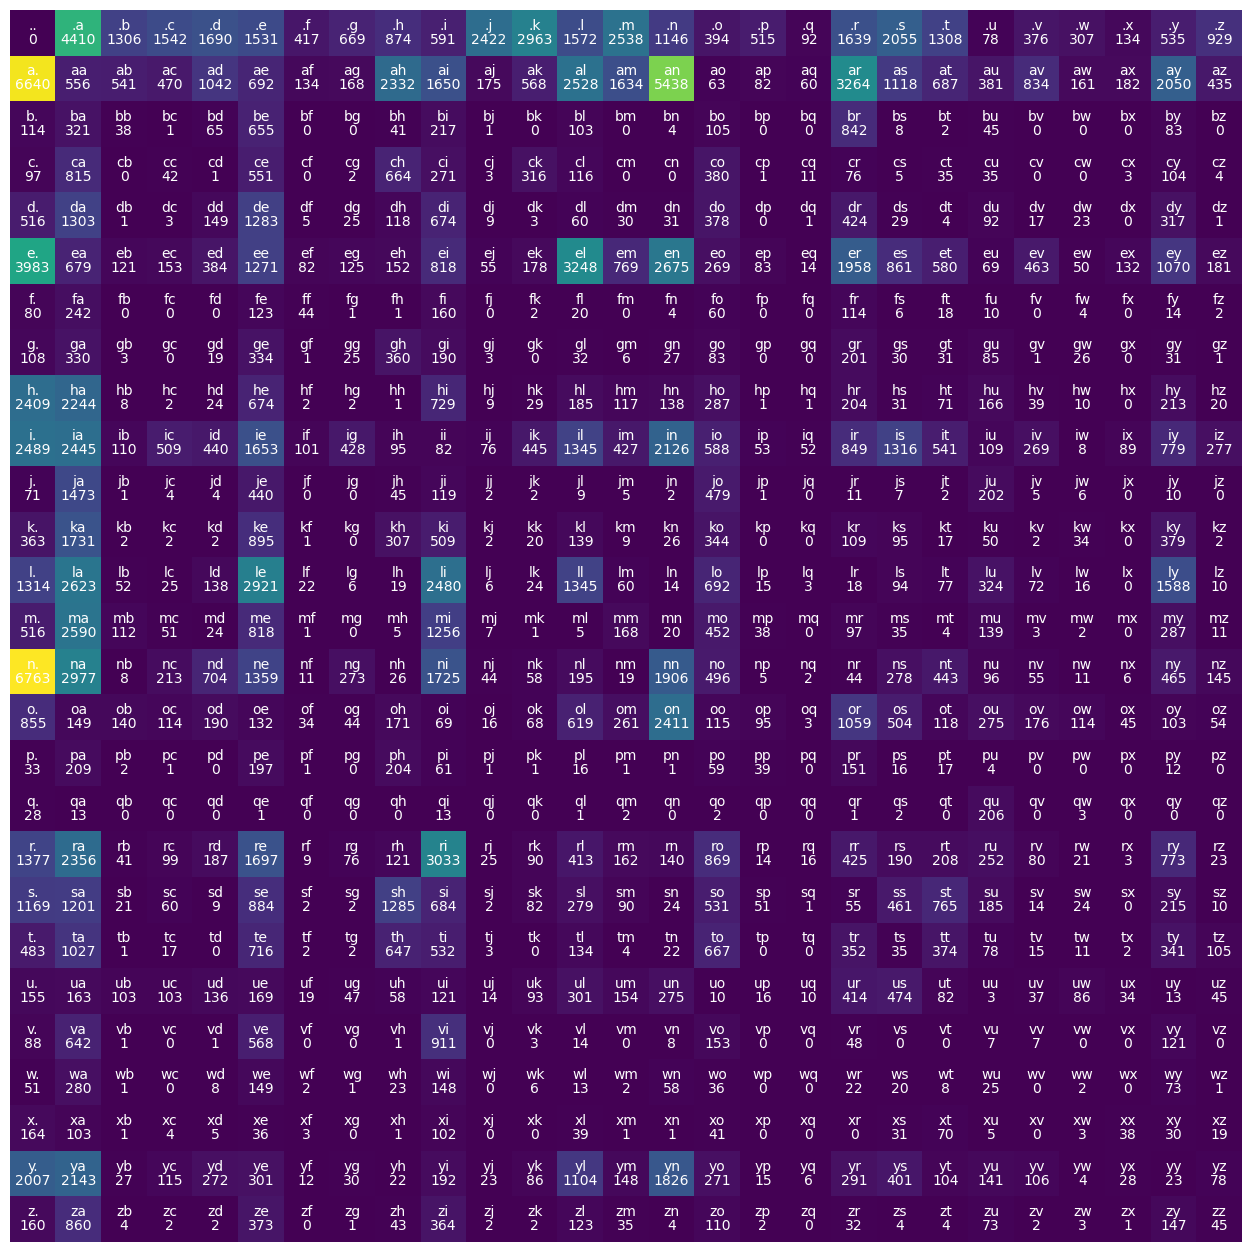

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(bigram_array)
for i in range(27):
    for j in range(27):
        combined_char = itoa[i] + itoa[j]
        plt.text(j, i, combined_char, ha='center', va='bottom', color='white')  #plt.text() takes in col, row
        plt.text(j, i, bigram_array[i, j].item(), ha='center', va='top', color='white')
plt.axis('off')

In [14]:
#array for first characters of words 
bigram_array[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [15]:
p = bigram_array[0].float()/bigram_array[0].sum().float()  #the probabilities
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [16]:
g = torch.Generator().manual_seed(2147483647)  #seed to ensure same randomness among trials
sample_ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()  #probability sampling with replacement
itoa[sample_ix]

'c'

In [17]:
bigram_array = bigram_array+1   #model smoothening where no pairs will have a 0 count, where the fake count added is 1

In [18]:
#a better way to find the probs where we find the probs of each of the cells of each of the rows
row_sums = bigram_array.sum(1, keepdim=True)  #on letting keepdim be False, the output is reduced to a 1st order tensor
#with just the appropriate dim, so [1, 27] which is a 2nd order tensor is reduced to [27] which is a 1st order tensor
row_sums.shape
P = bigram_array.float()/row_sums  #row_sums is broadcasted to make the shape of it [27, 27] so each of the row vals are repeated
#27 times within that row
P  #prob array

tensor([[3.1192e-05, 1.3759e-01, 4.0767e-02, 4.8129e-02, 5.2745e-02, 4.7785e-02,
         1.3038e-02, 2.0898e-02, 2.7293e-02, 1.8465e-02, 7.5577e-02, 9.2452e-02,
         4.9064e-02, 7.9195e-02, 3.5777e-02, 1.2321e-02, 1.6095e-02, 2.9008e-03,
         5.1154e-02, 6.4130e-02, 4.0830e-02, 2.4641e-03, 1.1759e-02, 9.6070e-03,
         4.2109e-03, 1.6719e-02, 2.9008e-02],
        [1.9583e-01, 1.6425e-02, 1.5983e-02, 1.3889e-02, 3.0756e-02, 2.0435e-02,
         3.9809e-03, 4.9835e-03, 6.8796e-02, 4.8685e-02, 5.1899e-03, 1.6779e-02,
         7.4575e-02, 4.8213e-02, 1.6039e-01, 1.8872e-03, 2.4475e-03, 1.7988e-03,
         9.6279e-02, 3.2997e-02, 2.0288e-02, 1.1264e-02, 2.4623e-02, 4.7771e-03,
         5.3963e-03, 6.0480e-02, 1.2857e-02],
        [4.3039e-02, 1.2051e-01, 1.4596e-02, 7.4850e-04, 2.4701e-02, 2.4551e-01,
         3.7425e-04, 3.7425e-04, 1.5719e-02, 8.1587e-02, 7.4850e-04, 3.7425e-04,
         3.8922e-02, 3.7425e-04, 1.8713e-03, 3.9671e-02, 3.7425e-04, 3.7425e-04,
         3.1549e-

In [19]:
P[2].sum()  #chking a random rows sum of probs and it is 1 as expected  

tensor(1.)

In [20]:
#two tensors are broadcastable if the two conditions are followed
#1) each tensor has atleast one dim
#2) when iterating over the dim sizes, starting from the trailing end, the dims shld match, or one of it shld be 1 or 1
#of it shld be missing, if its missing, it creates a dim, namely 1

In [21]:
#as an egs, 27, 27 and 27 tensors will be broadcasted in the following way
#27, 27
#   ,27

#before checking, tab everything to the right, then since the leftmost one is empty, torch fills it with 1, so 
#the 27 dim 1st order tensor becomes a 2nd order tensor with 1,27 dim 

In [22]:
#generating some words based on this bigram model

g = torch.Generator().manual_seed(2147483647)
for i in range(10):
    out = []
    ix = 0
    while True:
        #p = bigram_array[ix].float()/bigram_array.sum().float()  #probability of each char occuring after char itoa[ix]
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itoa[ix])
        if ix == 0:   #if . is reached, it indicates the end of word
            break 
    print(''.join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.


In [23]:
#the loss func for its evaluation
#loss = -log(likelihood) where likelihood = (p..)*(p.a)*(p.b)*.....*(pzz)

In [24]:
log_likelihood = 0
n = 0

for word in words:
    hallucinated_word = ['.'] + list(word)+ ['.']
    for ch1, ch2 in zip(hallucinated_word, hallucinated_word[1:]):
        ix1 = atoi[ch1]
        ix2 = atoi[ch2]
        log_likelihood += torch.log(P[ix1, ix2])
        n += 1
        
normalised_log_likelihood = log_likelihood/(-n)
print(normalised_log_likelihood)

tensor(2.4544)


In [25]:
#can also test how likely a word is to occur
log_likelihood = 0
n = 0

for word in ["andrejq"]:  #list of words, in this case only one word given, "ayush"
    hallucinated_word = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(hallucinated_word, hallucinated_word[1:]):
        ix1 = atoi[ch1]
        ix2 = atoi[ch2]
        log_likelihood += torch.log(P[ix1, ix2])
        n += 1
        print(f"{ch1}{ch2}: prob: {P[ix1, ix2]} log_likelihood{log_likelihood}")

normalised_log_likelihood = log_likelihood/(-n)
print(normalised_log_likelihood)

#so "ayush" has a pretty good chance of occuring with the normalised_log_likelihood valu being close to 2

.a: prob: 0.13758577406406403 log_likelihood-1.983507752418518
an: prob: 0.16038569808006287 log_likelihood-3.8136816024780273
nd: prob: 0.03841124475002289 log_likelihood-7.073086738586426
dr: prob: 0.07695093005895615 log_likelihood-9.637674331665039
re: prob: 0.13341714441776276 log_likelihood-11.651948928833008
ej: prob: 0.002738386392593384 log_likelihood-17.552335739135742
jq: prob: 0.0003416467516217381 log_likelihood-25.534069061279297
q.: prob: 0.09698996692895889 log_likelihood-27.867216110229492
tensor(3.4834)


In [26]:
#NN approach

In [27]:
#making a training set for the NN
xs, ys = [], []  #xs represents the letters which come first, and ys represents the letter than follows that corresponding
#letter in xs

for w in words:
    hallucinated_word = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(hallucinated_word, hallucinated_word[1:]):
        ix1 = atoi[ch1]
        ix2 = atoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)

print(xs)
print(ys)

tensor([ 0,  5, 13,  ..., 25, 26, 24])
tensor([ 5, 13, 13,  ..., 26, 24,  0])


In [28]:
#we cant feed in the integers as is in the NN, instead we one hot encode these ints, so that the input layer of the NN
#can have 27 neurons, each representing a certain value
import torch.nn.functional as F

In [29]:
xenc = F.one_hot(xs, num_classes=27).float()
yenc = F.one_hot(ys, num_classes=27).float()

In [30]:
xenc.shape

torch.Size([228146, 27])

In [31]:
# plt.imshow(xenc)

In [32]:
#since we have the training data now, we move on to defining the loss
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)   #.randn is used to generate random nums from a normal distribution meaning that 
#the numbers to occur are mostly going to be around 0 plus or minus, as the normal plot peaks in that region 

#also letting weights be closer to 0 is the same thing as label smoothening, where in prev case of bigram count table, 
#if we added a huge fake count to each and every cell, the prob dist would be uniform, and the equivalent in case of NN
#is letting the weights be closer to 0, as in this case, the exp of all the weight would be closer to 1, and hence 
#probs would be uniform/very similar to each other 

In [33]:
#here we have only 2 layers in the NN, one the input and other the output, and also the softmax layer, which represents
#the output layer's neurons activations in terms of probability wrt each other 
logits = xenc @ W  #matrix multiplication, what this does it multiply each of the activations of each of the input layer neurons
#to the weights of each of the neurons in the input layer to any one of the neurons in the next

In [34]:
logits.shape

torch.Size([228146, 27])

In [35]:
#where in logits matrix, each row has the activations of the next layer for one input egs, the next row has the activations
#for the next input egs and so on..

In [36]:
#applying softmax on it
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)

In [37]:
probs

tensor([[0.0607, 0.0100, 0.0123,  ..., 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248,  ..., 0.0118, 0.0022, 0.0472],
        [0.0312, 0.0737, 0.0484,  ..., 0.1204, 0.0469, 0.0126],
        ...,
        [0.0301, 0.0080, 0.0090,  ..., 0.0125, 0.0531, 0.0111],
        [0.0634, 0.0270, 0.0101,  ..., 0.0833, 0.0175, 0.0517],
        [0.0308, 0.0113, 0.0178,  ..., 0.0190, 0.0116, 0.0562]],
       grad_fn=<DivBackward0>)

In [38]:
#each row gives the prob that the model thinks is true for each of the training egs put in, so for the first egs, say if '.'
#was put in, then the input layers neurons would all be 0 except for that at position 0, which would be 1, and for that egs,
#the output probs that we get is given in the first layer, where we see that the prob of . again occuring is 0.0607, a occuring
#after it is 0.0100 etc, ofc it hasnt been trained yet, but this is the way the interpretation is supposed to go

In [39]:
print(ys.shape[0])

228146


In [40]:
loss = -probs[torch.arange(ys.shape[0]), ys].log().mean()    #only picks up the probs of the interested outputs, so say in row 1, we have lots of probs
#but row 1 actually represents the case of 'm' occuring after 'e', now we are only interested in the prob of 'm' occuring next
#then in this row, and we only pick this. And the neg log likelihood is computed using this 

In [41]:
loss  #pretty high loss rn

tensor(3.7590, grad_fn=<NegBackward0>)

In [42]:
W.grad = None   #set them to be None initially
loss.backward()

In [43]:
W.grad

tensor([[ 8.5187e-03, -1.7928e-02, -3.9954e-03, -6.1678e-03, -5.0425e-03,
         -4.9856e-03, -1.4495e-03,  3.2138e-04, -1.9076e-03,  1.8004e-03,
         -9.5068e-03, -9.0844e-03, -5.6108e-03, -9.9720e-03,  1.9904e-03,
          3.1664e-02,  6.2140e-03, -5.3713e-05, -3.6864e-03, -8.2406e-03,
         -9.7538e-04,  1.1900e-03, -1.2434e-03,  1.4365e-03,  1.0683e-03,
          1.9233e-02,  1.6413e-02],
        [-2.6880e-02, -1.1534e-03,  3.5157e-03, -5.7258e-04,  4.4327e-03,
          1.5423e-03,  1.5517e-02,  1.2128e-03, -8.3641e-03, -6.5184e-03,
          1.4442e-02, -1.2133e-03,  3.5937e-03, -5.5054e-03, -2.0389e-02,
          2.7948e-03,  5.7026e-03,  8.9113e-04, -9.4967e-04,  2.9929e-03,
          3.8649e-03,  2.9188e-03, -2.8925e-03,  4.1746e-03,  8.9087e-03,
         -1.5171e-03, -5.5008e-04],
        [-2.1135e-04, -1.3155e-03,  1.9726e-04,  3.9496e-04, -1.8479e-04,
         -2.7573e-03,  2.8475e-04,  2.0133e-04, -9.1831e-05, -8.9764e-04,
          6.3084e-04,  1.0288e-04,  9.73

In [ ]:
#gradient descent
for i in range(200):

    #forward pass
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W
    count = logits.exp()
    probs = count / count.sum(1, keepdim=True)
    loss = -probs[torch.arange(ys.shape[0]), ys].log().mean() + 0.01*(W**2).mean()
    #where the second term in loss is the regularisation term/ the smoothening term, where we try to incentivise
    #the probs being uniform to a very small extent, by incentivising letting weight be closer to 0 to a very small
    #extent. The term 0.01 behaves the same way as the fake count in case of bigram count table, so a little fake count
    #/a little regularisation const in this case is good, as it prevents extremes in prediction, and smoothens the predictions
    #just enough, also regularisation is also a method to prevent overfitting by letting Ws be lower values, as we know that
    #if overfitting happens then weights tend to take on more extreme values to better fit the training data, and reg helps
    #combat that. Here L1 reg is performed since sq of the params we taken 

    #could also use F.cross_entropy(logits, ys) instead of the above loss, as it does the same thing, but in a more efficient way
    print(loss)

    #backward pass
    W.grad = None
    loss.backward()

    #update
    W.data += -10*W.grad  #in this case we see that the loss decreases pretty slowly so we can afford a higher learning rate

tensor(3.7686, grad_fn=<AddBackward0>)
tensor(3.6794, grad_fn=<AddBackward0>)
tensor(3.5999, grad_fn=<AddBackward0>)
tensor(3.5285, grad_fn=<AddBackward0>)
tensor(3.4640, grad_fn=<AddBackward0>)
tensor(3.4057, grad_fn=<AddBackward0>)
tensor(3.3529, grad_fn=<AddBackward0>)
tensor(3.3052, grad_fn=<AddBackward0>)
tensor(3.2619, grad_fn=<AddBackward0>)
tensor(3.2227, grad_fn=<AddBackward0>)
tensor(3.1870, grad_fn=<AddBackward0>)
tensor(3.1544, grad_fn=<AddBackward0>)
tensor(3.1244, grad_fn=<AddBackward0>)
tensor(3.0969, grad_fn=<AddBackward0>)
tensor(3.0715, grad_fn=<AddBackward0>)
tensor(3.0479, grad_fn=<AddBackward0>)
tensor(3.0259, grad_fn=<AddBackward0>)
tensor(3.0054, grad_fn=<AddBackward0>)
tensor(2.9863, grad_fn=<AddBackward0>)
tensor(2.9684, grad_fn=<AddBackward0>)
tensor(2.9517, grad_fn=<AddBackward0>)
tensor(2.9359, grad_fn=<AddBackward0>)
tensor(2.9211, grad_fn=<AddBackward0>)
tensor(2.9071, grad_fn=<AddBackward0>)
tensor(2.8939, grad_fn=<AddBackward0>)
tensor(2.8815, grad_fn=<A

In [45]:
W.data

tensor([[-1.6708e+00,  2.0384e+00,  8.1793e-01,  9.8459e-01,  1.0765e+00,
          9.7742e-01, -3.8095e-01,  1.4729e-01,  4.1466e-01,  2.4821e-02,
          1.4375e+00,  1.6397e+00,  1.0039e+00,  1.4845e+00,  6.8681e-01,
         -3.5666e-01, -1.0828e-01, -1.7052e+00,  1.0458e+00,  1.2727e+00,
          8.1947e-01, -1.4419e+00, -4.8993e-01, -5.9009e-01, -1.1955e+00,
         -7.0556e-02,  4.7628e-01],
        [ 2.1632e+00, -3.4657e-01, -3.6133e-01, -5.1902e-01,  3.0071e-01,
         -1.1409e-01, -1.4441e+00, -1.4189e+00,  1.1126e+00,  7.6443e-01,
         -1.2962e+00, -3.2428e-01,  1.1937e+00,  7.5462e-01,  1.9629e+00,
         -1.8229e+00, -1.6831e+00, -2.0110e+00,  1.4505e+00,  3.7185e-01,
         -1.2086e-01, -7.0451e-01,  7.2295e-02, -1.3780e+00, -1.2795e+00,
          9.8295e-01, -6.0203e-01],
        [ 3.8465e-01,  1.0615e+00,  1.8387e-02, -1.7693e-01, -5.7375e-01,
          2.3216e+00, -3.6336e-01, -5.7397e-01, -8.5171e-01,  9.1873e-02,
          2.6366e-02, -1.0477e+00,  7.85

In [46]:
def output_layer(ix):
    '''predict the next char: just a fancy way of saying forawrd passing the given char through the pretrained
    NN
    '''
    x = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = x @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)
    return probs


In [47]:
#generating 5 names from the trained model
g = torch.Generator().manual_seed(2147483647)
for i in range(5):
    out = []
    ix = 0   #first letter is always '.'
    while True:
        probs = output_layer(ix)

        ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
        out.append(itoa[ix])

        if (ix==0):
            break
    print(''.join(out))


cexza.
mogllurailezityha.
konimittain.
llayn.
ka.
